# Exploración rápida Módulo 1 (Bahrein 2024 Carrera)
Cargamos los artefactos de `data/module1_ingestion/2024_Bahrain_Grand_Prix_R/` para revisar formas de los datos y algunas visualizaciones básicas (tiempo vs velocidad, distancia vs velocidad).

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

base = '../feature_extraction/data/module1_ingestion/2024_Bahrain_Grand_Prix_R'

telemetry_time = pd.read_csv(f"{base}/telemetry_time_10hz.csv")
telemetry_dist = pd.read_csv(f"{base}/telemetry_distance_aligned.csv")
meta = pd.read_csv(f"{base}/laps_metadata.csv")
laps = pd.read_csv(f"{base}/laps.csv")

pd.set_option('display.width', 140)
pd.set_option('display.max_columns', 20)
print('Shapes -> time:', telemetry_time.shape, 'dist:', telemetry_dist.shape, 'meta:', meta.shape, 'laps:', laps.shape)
telemetry_time.head()

Shapes -> time: (19003, 15) dist: (107295, 16) meta: (20, 5) laps: (1129, 32)


,RelativeTime_s,Speed,Throttle,Brake,nGear,RPM,DRS,Distance,RelativeDistance,X,Y,Driver,LapNumber,Compound,TyreLife
0,0.0,283.075002,100.0,False,7,11262.849997,0,0.002732,5.072732e-07,-379.607928,1297.719518,1,39,SOFT,2
1,0.1,283.075002,100.0,False,7,11262.849997,0,0.002732,5.072732e-07,-379.607928,1297.719518,1,39,SOFT,2
2,0.2,285.000000,100.0,False,7,11259.000000,0,12.195000,2.264589e-03,-371.982577,1455.807887,1,39,SOFT,2
3,0.3,285.278572,100.0,False,7,11285.185757,0,18.382242,3.413548e-03,-369.000000,1516.000000,1,39,SOFT,2
4,0.4,285.278572,100.0,False,7,11285.185757,0,18.382242,3.413548e-03,-369.000000,1516.000000,1,39,SOFT,2


In [4]:
# Resumen de las vueltas usadas (vuelta más rápida por piloto)
meta[['Driver','LapNumber','LapTimeSeconds','Compound','TyreLife']].sort_values('LapTimeSeconds').reset_index(drop=True)

,Driver,LapNumber,LapTimeSeconds,Compound,TyreLife
0,1,39,92.608,SOFT,2
1,16,36,94.090,HARD,2
2,14,48,94.199,HARD,7
3,11,40,94.364,SOFT,4
4,4,35,94.476,HARD,2
5,55,44,94.507,HARD,9
6,44,39,94.722,HARD,6
7,2,42,94.735,SOFT,2
8,10,45,94.805,SOFT,2
9,27,46,94.834,SOFT,6


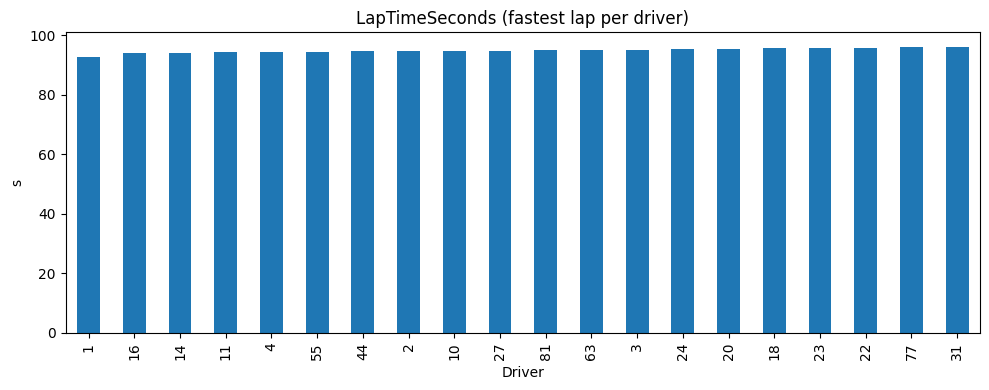

In [5]:
# Distribución de tiempos de vuelta por piloto
lap_summary = meta[['Driver','LapTimeSeconds']].sort_values('LapTimeSeconds')
ax = lap_summary.plot(kind='bar', x='Driver', y='LapTimeSeconds', figsize=(10,4), legend=False, title='LapTimeSeconds (fastest lap per driver)')
ax.set_ylabel('s')
plt.tight_layout()
plt.show()

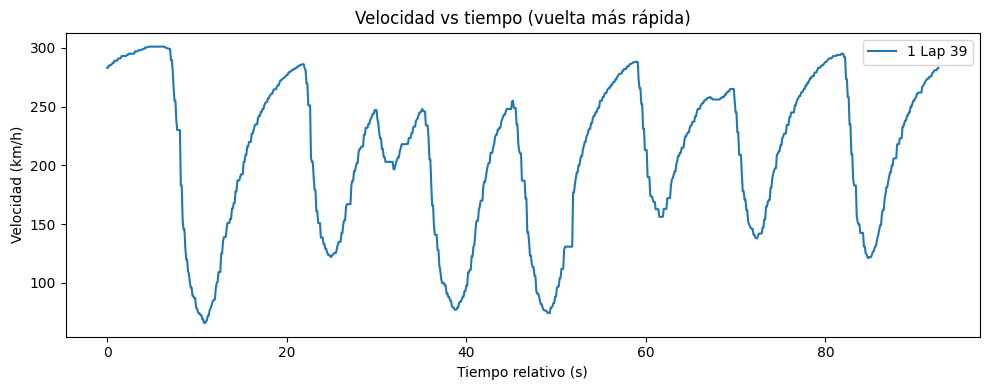

In [10]:
# Velocidad vs tiempo (10 Hz) para el piloto más rápido
fastest = meta.sort_values('LapTimeSeconds').iloc[0]
d = fastest['Driver']; lap = fastest['LapNumber']
sel = telemetry_time[(telemetry_time.Driver == d) & (telemetry_time.LapNumber == lap)]
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(sel['RelativeTime_s'], sel['Speed'], label=f"{d} Lap {lap}")
ax.set_xlabel('Tiempo relativo (s)')
ax.set_ylabel('Velocidad (km/h)')
ax.set_title('Velocidad vs tiempo (vuelta más rápida)')
ax.legend()
plt.tight_layout()
plt.show()

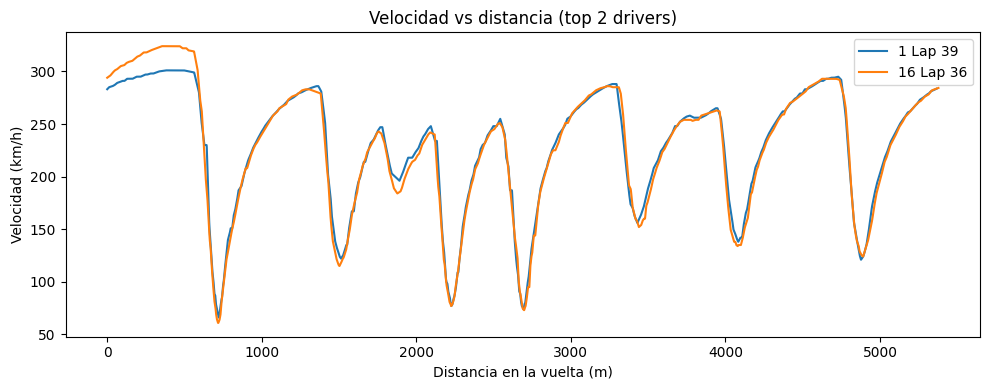

In [7]:
# Velocidad vs distancia (ghost) para los dos más rápidos
top2 = meta.sort_values('LapTimeSeconds').head(2)
fig, ax = plt.subplots(figsize=(10,4))
for _, row in top2.iterrows():
    d = row['Driver']; lap = row['LapNumber']
    sel = telemetry_dist[(telemetry_dist.Driver == d) & (telemetry_dist.LapNumber == lap)]
    ax.plot(sel['Distance_m'], sel['Speed'], label=f"{d} Lap {lap}")
ax.set_xlabel('Distancia en la vuelta (m)')
ax.set_ylabel('Velocidad (km/h)')
ax.set_title('Velocidad vs distancia (top 2 drivers)')
ax.legend()
plt.tight_layout()
plt.show()

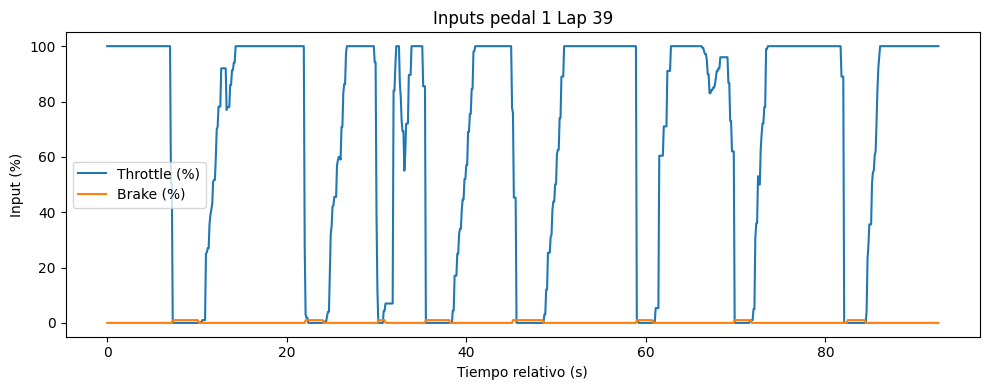

In [11]:
# Relación Throttle/Brake vs tiempo para el piloto más rápido
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(sel['RelativeTime_s'], sel['Throttle'], label='Throttle (%)')
ax.plot(sel['RelativeTime_s'], sel['Brake'], label='Brake (%)')
ax.set_xlabel('Tiempo relativo (s)')
ax.set_ylabel('Input (%)')
ax.set_title(f'Inputs pedal {fastest["Driver"]} Lap {fastest["LapNumber"]}')
ax.legend()
plt.tight_layout()
plt.show()